In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from pandas.plotting import scatter_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics.pairwise import linear_kernel
from sklearn import metrics
import os
import re
import nltk
import json
import nltk.corpus  
import pandas as pd
import numpy as np
from copy import deepcopy
from nltk.stem import PorterStemmer

from datetime import date
from datetime import time
import time
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
nltk.download('punkt')
nltk.download('stopwords')

resumeDataSet =pd.read_csv (r'linkkk.csv')
resumeDataSet['cleaned_resume'] = ''
resumeDataSet['date'] = ''
resumeDataSet.head()

[nltk_data] Downloading package punkt to /Users/jihed/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/jihed/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,linkedinProfile,headline,location,fullName,userId,company,jobTitle,jobDateRange,allSkills,cleaned_resume,date
0,https://www.linkedin.com/in/rami-tajouri-bb951...,Full Stack Web Developer chez be-softilys Tunisie,"Ben Arous, Tunisie",Rami Tajouri,496958973,be-softilys Tunisie,Full Stack Web Developer,May 2020 – September 2021,Framework Spring JavaScript Angular Java Enter...,,
1,https://www.linkedin.com/in/khaled-tlili-85b88...,Développeur web full stack chez Sofrecom Tunisie,"Tunis, Tunisie",khaled tlili,450067463,Sofrecom Tunisie,Full Stack Web Developer,July 2020 – September 2021,"Node.js, Customer Relationship Management (CRM...",,
2,https://www.linkedin.com/in/jerbi-khalil/,SEO specialist & Web Developer - Segmalog,"Medenine, Tunisie",jerbi khalil,175770991,Segmalog Tunisie - Création Site Web | Référen...,Full Stack Web Developer,July 2014 – September 2021,"Node.js, Customer Relationship Management (CRM...",,
3,https://www.linkedin.com/in/manel-riahi-6113ab...,Web Developer في Crésus Design,"Tunis, Tunisie",Manel Riahi,669834157,Crésus Design,Full Stack Web Developer,September 2020 – September 2021,"business intelligence, Java, Java Enterprise E...",,
4,https://www.linkedin.com/in/amine-bh/,Software engineer | Full Stack Web Developer P...,"Ben Arous, Tunisie",Amine Bel Hadj,311059150,Sofrecom Tunisie,Full Stack Web Developer,March 2018 – September 2021,"Méthodes agiles, PHP Web Development (OOP), Fr...",,


In [2]:
resumeDataSet['allSkills'].isnull().sum()

0

In [3]:
print ("Displaying the distinct categories of resume and the number of records belonging to each category -")
print (resumeDataSet['jobTitle'].value_counts())

Displaying the distinct categories of resume and the number of records belonging to each category -
Consultant BI               30
Data Scientist              16
Web developer               14
Python Developer            12
Full Stack Web Developer    10
Ingénieur sécurité           8
Name: jobTitle, dtype: int64


<AxesSubplot:xlabel='count', ylabel='jobTitle'>

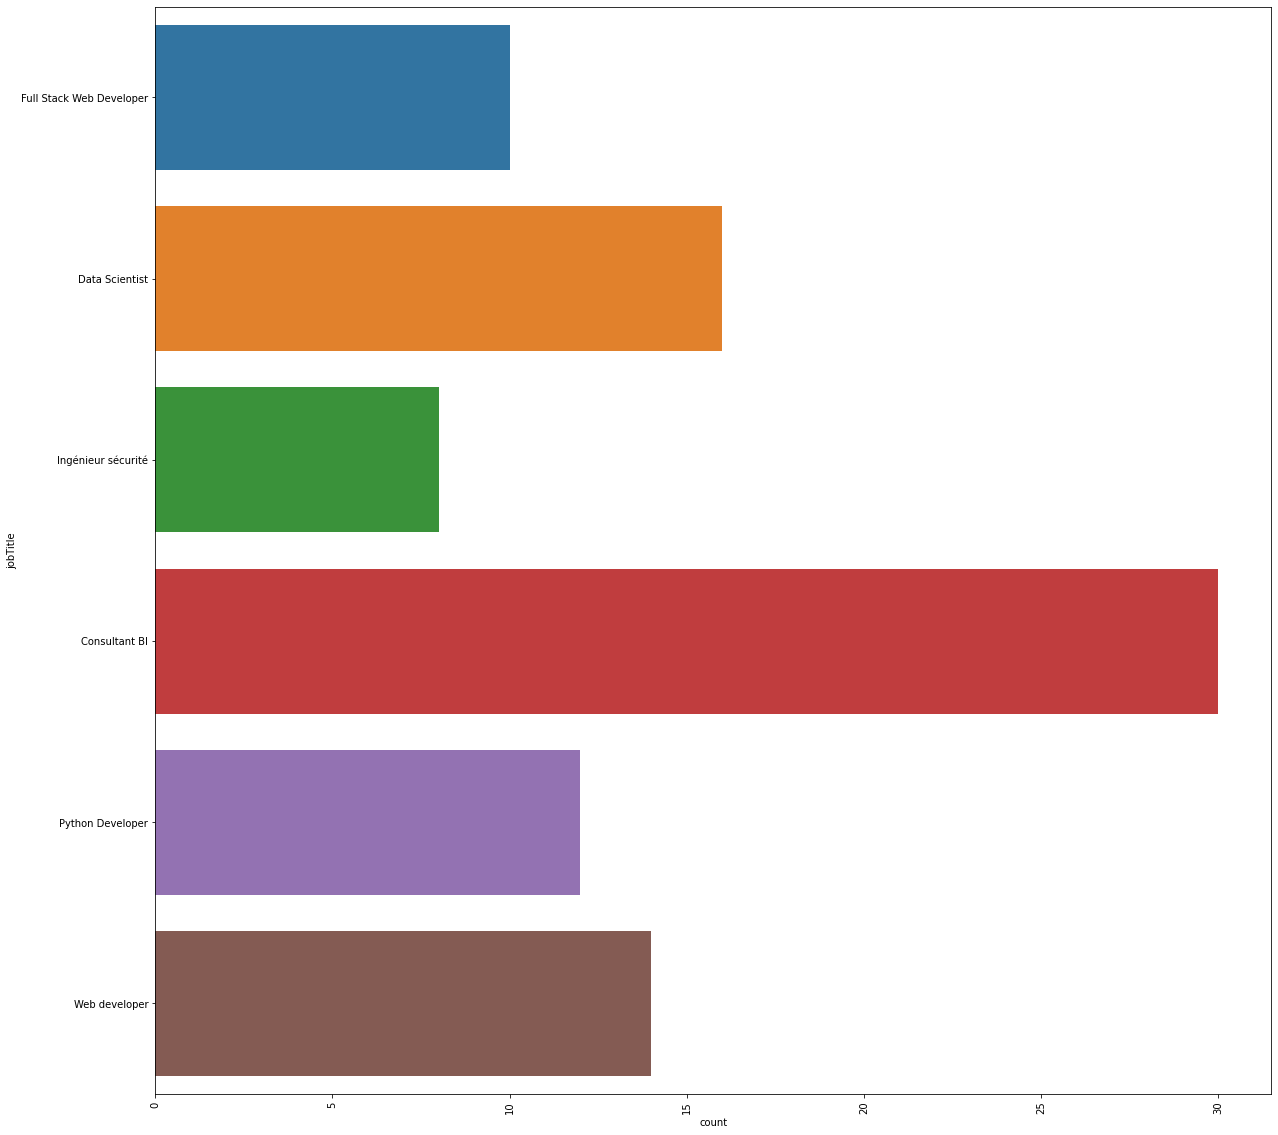

In [4]:
import seaborn as sns
plt.figure(figsize=(20,20))
plt.xticks(rotation=90)
sns.countplot(y="jobTitle", data=resumeDataSet)

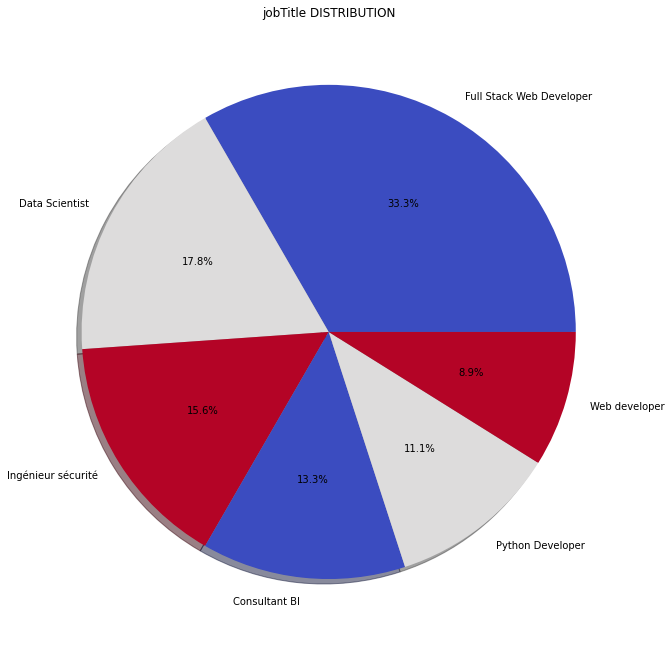

In [5]:
from matplotlib.gridspec import GridSpec
targetCounts = resumeDataSet['jobTitle'].value_counts()
targetLabels  = resumeDataSet['jobTitle'].unique()
# Make square figures and axes
plt.figure(1, figsize=(25,25))
the_grid = GridSpec(2, 2)


cmap = plt.get_cmap('coolwarm')
colors = [cmap(i) for i in np.linspace(0, 1, 3)]
plt.subplot(the_grid[0, 1], aspect=1, title='jobTitle DISTRIBUTION')

source_pie = plt.pie(targetCounts, labels=targetLabels, autopct='%1.1f%%', shadow=True, colors=colors)
plt.show()

In [6]:
import re
def cleanResume(resumeText):
    resumeText = re.sub('http\S+\s*', ' ', resumeText)  # remove URLs
    resumeText = re.sub('RT|cc', ' ', resumeText)  # remove RT and cc
    resumeText = re.sub('#\S+', '', resumeText)  # remove hashtags
    resumeText = re.sub('@\S+', '  ', resumeText)  # remove mentions
    resumeText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', resumeText)  # remove punctuations
    resumeText = re.sub(r'[^\x00-\x7f]',r' ', resumeText) 
    resumeText = re.sub('\s+', ' ', resumeText)  # remove extra whitespace
    return resumeText

In [7]:
resumeDataSet['cleaned_resume'] = resumeDataSet.allSkills.apply(lambda x: cleanResume(x))
print (resumeDataSet['cleaned_resume'])

0     Framework Spring JavaScript Angular Java Enter...
1      Node js Customer Relationship Management CRM PHP
2      Node js Customer Relationship Management CRM PHP
3     business intelligence Java Java Enterprise Edi...
4     M thodes agiles PHP Web Development OOP Framew...
                            ...                        
85    WordPress Joomla Web Design E commerce CSS CSS...
86    WordPress Joomla Web Design E commerce CSS CSS...
87    React js Node js JavaScript Vue js MongoDB HTM...
88    symfony j2EE SASS Scrum Site web adaptatif Pro...
89                                 React js Node js Git
Name: cleaned_resume, Length: 90, dtype: object


[('SQL', 133), ('de', 104), ('Microsoft', 85), ('Server', 71), ('C', 54), ('Java', 48), ('Services', 48), ('es', 48), ('donn', 47), ('Data', 47), ('JavaScript', 34), ('PHP', 34), ('CSS', 33), ('Python', 32), ('MySQL', 31), ('js', 31), ('HTML', 30), ('Gestion', 29), ('HTML5', 27), ('R', 27), ('Web', 25), ('Oracle', 25), ('D', 24), ('Analyse', 24), ('BI', 24), ('SSIS', 23), ('veloppement', 23), ('Framework', 22), ('Management', 22), ('Integration', 21), ('Talend', 21), ('Linux', 20), ('SSRS', 19), ('NET', 19), ('Office', 19), ('Reporting', 18), ('Development', 18), ('Symfony', 18), ('projet', 18), ('des', 18), ('Programmation', 17), ('Power', 17), ('jQuery', 16), ('Excel', 16), ('web', 16), ('Informatique', 16), ('MongoDB', 15), ('data', 15), ('Big', 15), ('Studio', 15)]


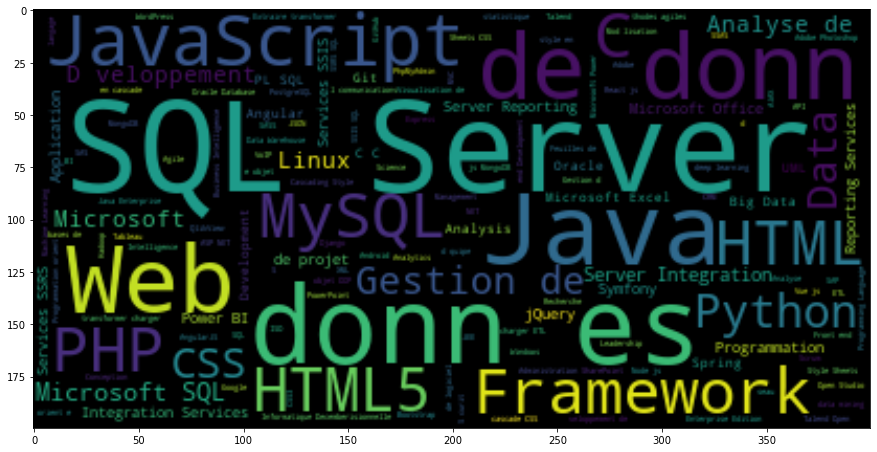

In [8]:
import nltk
from nltk.corpus import stopwords
import string
from wordcloud import WordCloud

oneSetOfStopWords = set(stopwords.words('english')+['``',"''"])
totalWords =[]
Sentences = resumeDataSet['allSkills'].values
cleanedSentences = ""
for i in range(0,87):
    cleanedText = cleanResume(Sentences[i])
    cleanedSentences += cleanedText
    requiredWords = nltk.word_tokenize(cleanedText)
    for word in requiredWords:
        if word not in oneSetOfStopWords and word not in string.punctuation:
            totalWords.append(word)
    
wordfreqdist = nltk.FreqDist(totalWords)
mostcommon = wordfreqdist.most_common(50)
print(mostcommon)

wc = WordCloud().generate(cleanedSentences)
plt.figure(figsize=(15,15))
plt.imshow(wc, interpolation='bilinear')
plt.axis("on")
plt.show()

In [9]:
new = resumeDataSet['jobDateRange'].str.split("–", n = -1, expand = True)
resumeDataSet['date1'] = new[0]
resumeDataSet['date2'] = new[1]
resumeDataSet.drop(columns =["jobDateRange"], inplace = True)
resumeDataSet

,linkedinProfile,headline,location,fullName,userId,company,jobTitle,allSkills,cleaned_resume,date,date1,date2
0,https://www.linkedin.com/in/rami-tajouri-bb951...,Full Stack Web Developer chez be-softilys Tunisie,"Ben Arous, Tunisie",Rami Tajouri,496958973,be-softilys Tunisie,Full Stack Web Developer,Framework Spring JavaScript Angular Java Enter...,Framework Spring JavaScript Angular Java Enter...,,May 2020,September 2021
1,https://www.linkedin.com/in/khaled-tlili-85b88...,Développeur web full stack chez Sofrecom Tunisie,"Tunis, Tunisie",khaled tlili,450067463,Sofrecom Tunisie,Full Stack Web Developer,"Node.js, Customer Relationship Management (CRM...",Node js Customer Relationship Management CRM PHP,,July 2020,September 2021
2,https://www.linkedin.com/in/jerbi-khalil/,SEO specialist & Web Developer - Segmalog,"Medenine, Tunisie",jerbi khalil,175770991,Segmalog Tunisie - Création Site Web | Référen...,Full Stack Web Developer,"Node.js, Customer Relationship Management (CRM...",Node js Customer Relationship Management CRM PHP,,July 2014,September 2021
3,https://www.linkedin.com/in/manel-riahi-6113ab...,Web Developer في Crésus Design,"Tunis, Tunisie",Manel Riahi,669834157,Crésus Design,Full Stack Web Developer,"business intelligence, Java, Java Enterprise E...",business intelligence Java Java Enterprise Edi...,,September 2020,September 2021
4,https://www.linkedin.com/in/amine-bh/,Software engineer | Full Stack Web Developer P...,"Ben Arous, Tunisie",Amine Bel Hadj,311059150,Sofrecom Tunisie,Full Stack Web Developer,"Méthodes agiles, PHP Web Development (OOP), Fr...",M thodes agiles PHP Web Development OOP Framew...,,March 2018,September 2021
...,...,...,...,...,...,...,...,...,...,...,...,...
85,https://www.linkedin.com/in/adnanamara/,Frontend Developer at Bulldozer Inc,"Ariana, Tunisie",Adnan Amara,257154814,bulldozer,Web developer,"WordPress, Joomla, Web Design, E-commerce, CSS...",WordPress Joomla Web Design E commerce CSS CSS...,,April 2019,September 2021
86,https://www.linkedin.com/in/adnanamara/,Frontend Developer at Bulldozer Inc,"Ariana, Tunisie",Adnan Amara,257154814,bulldozer,Web developer,"WordPress, Joomla, Web Design, E-commerce, CSS...",WordPress Joomla Web Design E commerce CSS CSS...,,April 2019,September 2021
87,https://www.linkedin.com/in/khalil-jerbi-23569...,Frontend Developer (React/Vue.js),"Sousse, Tunisie",Khalil Jerbi,616799561,Proxym Group,Web developer,"React.js, Node.js, JavaScript, Vue.js, MongoDB...",React js Node js JavaScript Vue js MongoDB HTM...,,January 2019,September 2021
88,https://www.linkedin.com/in/omarhsouna/,Full Stack Javascript Developer,"Korba, Nabeul, Tunisie",Hsouna Omar,647212351,Edifixio,Web developer,"symfony, j2EE, SASS, Scrum, Site web adaptatif...",symfony j2EE SASS Scrum Site web adaptatif Pro...,,August 2019,September 2021


In [12]:
a=resumeDataSet['date1'].str.replace('janv','January')
b=a.str.replace('févr','February')
c=b.str.replace('mars','March')
d=c.str.replace('avr','April')
e=d.str.replace('mai','May')
f=e.str.replace('juin','June')
g=f.str.replace('juil','July')
h=g.str.replace('août','August')
i=h.str.replace('sept','September')
j=i.str.replace('oct','October')
k=j.str.replace('nov','November')
x=k.str.replace('déc','December')
resumeDataSet

,linkedinProfile,headline,location,fullName,userId,company,jobTitle,allSkills,cleaned_resume,date,date1,date2
0,https://www.linkedin.com/in/rami-tajouri-bb951...,Full Stack Web Developer chez be-softilys Tunisie,"Ben Arous, Tunisie",Rami Tajouri,496958973,be-softilys Tunisie,Full Stack Web Developer,Framework Spring JavaScript Angular Java Enter...,Framework Spring JavaScript Angular Java Enter...,,May 2020,September 2021
1,https://www.linkedin.com/in/khaled-tlili-85b88...,Développeur web full stack chez Sofrecom Tunisie,"Tunis, Tunisie",khaled tlili,450067463,Sofrecom Tunisie,Full Stack Web Developer,"Node.js, Customer Relationship Management (CRM...",Node js Customer Relationship Management CRM PHP,,July 2020,September 2021
2,https://www.linkedin.com/in/jerbi-khalil/,SEO specialist & Web Developer - Segmalog,"Medenine, Tunisie",jerbi khalil,175770991,Segmalog Tunisie - Création Site Web | Référen...,Full Stack Web Developer,"Node.js, Customer Relationship Management (CRM...",Node js Customer Relationship Management CRM PHP,,July 2014,September 2021
3,https://www.linkedin.com/in/manel-riahi-6113ab...,Web Developer في Crésus Design,"Tunis, Tunisie",Manel Riahi,669834157,Crésus Design,Full Stack Web Developer,"business intelligence, Java, Java Enterprise E...",business intelligence Java Java Enterprise Edi...,,September 2020,September 2021
4,https://www.linkedin.com/in/amine-bh/,Software engineer | Full Stack Web Developer P...,"Ben Arous, Tunisie",Amine Bel Hadj,311059150,Sofrecom Tunisie,Full Stack Web Developer,"Méthodes agiles, PHP Web Development (OOP), Fr...",M thodes agiles PHP Web Development OOP Framew...,,March 2018,September 2021
...,...,...,...,...,...,...,...,...,...,...,...,...
85,https://www.linkedin.com/in/adnanamara/,Frontend Developer at Bulldozer Inc,"Ariana, Tunisie",Adnan Amara,257154814,bulldozer,Web developer,"WordPress, Joomla, Web Design, E-commerce, CSS...",WordPress Joomla Web Design E commerce CSS CSS...,,April 2019,September 2021
86,https://www.linkedin.com/in/adnanamara/,Frontend Developer at Bulldozer Inc,"Ariana, Tunisie",Adnan Amara,257154814,bulldozer,Web developer,"WordPress, Joomla, Web Design, E-commerce, CSS...",WordPress Joomla Web Design E commerce CSS CSS...,,April 2019,September 2021
87,https://www.linkedin.com/in/khalil-jerbi-23569...,Frontend Developer (React/Vue.js),"Sousse, Tunisie",Khalil Jerbi,616799561,Proxym Group,Web developer,"React.js, Node.js, JavaScript, Vue.js, MongoDB...",React js Node js JavaScript Vue js MongoDB HTM...,,January 2019,September 2021
88,https://www.linkedin.com/in/omarhsouna/,Full Stack Javascript Developer,"Korba, Nabeul, Tunisie",Hsouna Omar,647212351,Edifixio,Web developer,"symfony, j2EE, SASS, Scrum, Site web adaptatif...",symfony j2EE SASS Scrum Site web adaptatif Pro...,,August 2019,September 2021


In [13]:
resumeDataSet['date2']= pd.to_datetime(resumeDataSet['date2'])
resumeDataSet['date2']


0    2021-09-01
1    2021-09-01
2    2021-09-01
3    2021-09-01
4    2021-09-01
        ...    
85   2021-09-01
86   2021-09-01
87   2021-09-01
88   2021-09-01
89   2021-09-01
Name: date2, Length: 90, dtype: datetime64[ns]

In [16]:
resumeDataSet['date1']= pd.to_datetime(resumeDataSet['date1'])
resumeDataSet['date1']

0    2020-05-01
1    2020-07-01
2    2014-07-01
3    2020-09-01
4    2018-03-01
        ...    
85   2019-04-01
86   2019-04-01
87   2019-01-01
88   2019-08-01
89   2019-10-01
Name: date1, Length: 90, dtype: datetime64[ns]

In [17]:
resumeDataSet

,linkedinProfile,headline,location,fullName,userId,company,jobTitle,allSkills,cleaned_resume,date,date1,date2
0,https://www.linkedin.com/in/rami-tajouri-bb951...,Full Stack Web Developer chez be-softilys Tunisie,"Ben Arous, Tunisie",Rami Tajouri,496958973,be-softilys Tunisie,Full Stack Web Developer,Framework Spring JavaScript Angular Java Enter...,Framework Spring JavaScript Angular Java Enter...,,2020-05-01,2021-09-01
1,https://www.linkedin.com/in/khaled-tlili-85b88...,Développeur web full stack chez Sofrecom Tunisie,"Tunis, Tunisie",khaled tlili,450067463,Sofrecom Tunisie,Full Stack Web Developer,"Node.js, Customer Relationship Management (CRM...",Node js Customer Relationship Management CRM PHP,,2020-07-01,2021-09-01
2,https://www.linkedin.com/in/jerbi-khalil/,SEO specialist & Web Developer - Segmalog,"Medenine, Tunisie",jerbi khalil,175770991,Segmalog Tunisie - Création Site Web | Référen...,Full Stack Web Developer,"Node.js, Customer Relationship Management (CRM...",Node js Customer Relationship Management CRM PHP,,2014-07-01,2021-09-01
3,https://www.linkedin.com/in/manel-riahi-6113ab...,Web Developer في Crésus Design,"Tunis, Tunisie",Manel Riahi,669834157,Crésus Design,Full Stack Web Developer,"business intelligence, Java, Java Enterprise E...",business intelligence Java Java Enterprise Edi...,,2020-09-01,2021-09-01
4,https://www.linkedin.com/in/amine-bh/,Software engineer | Full Stack Web Developer P...,"Ben Arous, Tunisie",Amine Bel Hadj,311059150,Sofrecom Tunisie,Full Stack Web Developer,"Méthodes agiles, PHP Web Development (OOP), Fr...",M thodes agiles PHP Web Development OOP Framew...,,2018-03-01,2021-09-01
...,...,...,...,...,...,...,...,...,...,...,...,...
85,https://www.linkedin.com/in/adnanamara/,Frontend Developer at Bulldozer Inc,"Ariana, Tunisie",Adnan Amara,257154814,bulldozer,Web developer,"WordPress, Joomla, Web Design, E-commerce, CSS...",WordPress Joomla Web Design E commerce CSS CSS...,,2019-04-01,2021-09-01
86,https://www.linkedin.com/in/adnanamara/,Frontend Developer at Bulldozer Inc,"Ariana, Tunisie",Adnan Amara,257154814,bulldozer,Web developer,"WordPress, Joomla, Web Design, E-commerce, CSS...",WordPress Joomla Web Design E commerce CSS CSS...,,2019-04-01,2021-09-01
87,https://www.linkedin.com/in/khalil-jerbi-23569...,Frontend Developer (React/Vue.js),"Sousse, Tunisie",Khalil Jerbi,616799561,Proxym Group,Web developer,"React.js, Node.js, JavaScript, Vue.js, MongoDB...",React js Node js JavaScript Vue js MongoDB HTM...,,2019-01-01,2021-09-01
88,https://www.linkedin.com/in/omarhsouna/,Full Stack Javascript Developer,"Korba, Nabeul, Tunisie",Hsouna Omar,647212351,Edifixio,Web developer,"symfony, j2EE, SASS, Scrum, Site web adaptatif...",symfony j2EE SASS Scrum Site web adaptatif Pro...,,2019-08-01,2021-09-01


In [19]:
a=resumeDataSet['date1'] = pd.to_datetime(resumeDataSet['date1'])
b=resumeDataSet['date2'] = pd.to_datetime(resumeDataSet['date2'])

c= (b.dt.year - a.dt.year) * 12 +(b.dt.month - a.dt.month)
resumeDataSet['experience']=c
resumeDataSet

,linkedinProfile,headline,location,fullName,userId,company,jobTitle,allSkills,cleaned_resume,date,date1,date2,experience
0,https://www.linkedin.com/in/rami-tajouri-bb951...,Full Stack Web Developer chez be-softilys Tunisie,"Ben Arous, Tunisie",Rami Tajouri,496958973,be-softilys Tunisie,Full Stack Web Developer,Framework Spring JavaScript Angular Java Enter...,Framework Spring JavaScript Angular Java Enter...,,2020-05-01,2021-09-01,16
1,https://www.linkedin.com/in/khaled-tlili-85b88...,Développeur web full stack chez Sofrecom Tunisie,"Tunis, Tunisie",khaled tlili,450067463,Sofrecom Tunisie,Full Stack Web Developer,"Node.js, Customer Relationship Management (CRM...",Node js Customer Relationship Management CRM PHP,,2020-07-01,2021-09-01,14
2,https://www.linkedin.com/in/jerbi-khalil/,SEO specialist & Web Developer - Segmalog,"Medenine, Tunisie",jerbi khalil,175770991,Segmalog Tunisie - Création Site Web | Référen...,Full Stack Web Developer,"Node.js, Customer Relationship Management (CRM...",Node js Customer Relationship Management CRM PHP,,2014-07-01,2021-09-01,86
3,https://www.linkedin.com/in/manel-riahi-6113ab...,Web Developer في Crésus Design,"Tunis, Tunisie",Manel Riahi,669834157,Crésus Design,Full Stack Web Developer,"business intelligence, Java, Java Enterprise E...",business intelligence Java Java Enterprise Edi...,,2020-09-01,2021-09-01,12
4,https://www.linkedin.com/in/amine-bh/,Software engineer | Full Stack Web Developer P...,"Ben Arous, Tunisie",Amine Bel Hadj,311059150,Sofrecom Tunisie,Full Stack Web Developer,"Méthodes agiles, PHP Web Development (OOP), Fr...",M thodes agiles PHP Web Development OOP Framew...,,2018-03-01,2021-09-01,42
...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,https://www.linkedin.com/in/adnanamara/,Frontend Developer at Bulldozer Inc,"Ariana, Tunisie",Adnan Amara,257154814,bulldozer,Web developer,"WordPress, Joomla, Web Design, E-commerce, CSS...",WordPress Joomla Web Design E commerce CSS CSS...,,2019-04-01,2021-09-01,29
86,https://www.linkedin.com/in/adnanamara/,Frontend Developer at Bulldozer Inc,"Ariana, Tunisie",Adnan Amara,257154814,bulldozer,Web developer,"WordPress, Joomla, Web Design, E-commerce, CSS...",WordPress Joomla Web Design E commerce CSS CSS...,,2019-04-01,2021-09-01,29
87,https://www.linkedin.com/in/khalil-jerbi-23569...,Frontend Developer (React/Vue.js),"Sousse, Tunisie",Khalil Jerbi,616799561,Proxym Group,Web developer,"React.js, Node.js, JavaScript, Vue.js, MongoDB...",React js Node js JavaScript Vue js MongoDB HTM...,,2019-01-01,2021-09-01,32
88,https://www.linkedin.com/in/omarhsouna/,Full Stack Javascript Developer,"Korba, Nabeul, Tunisie",Hsouna Omar,647212351,Edifixio,Web developer,"symfony, j2EE, SASS, Scrum, Site web adaptatif...",symfony j2EE SASS Scrum Site web adaptatif Pro...,,2019-08-01,2021-09-01,25


In [20]:
jobDataSet =pd.read_csv (r'/Users/raed/Downloads/job4.csv')
jobDataSet

,descreption,experience
0,Framework Spring JavaScript Angular Java Enter...,16


In [21]:
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(resumeDataSet['allSkills'].astype("U"))
print(tfidf_matrix.shape)


(90, 695)


In [22]:
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [23]:
indices = pd.Series(jobDataSet.index, index=jobDataSet['descreption']).drop_duplicates()
print(indices)

descreption
Framework Spring JavaScript Angular Java Enterprise Edition MySQL Java HTML5 Bootstrap jQuery    0
dtype: int64


In [35]:
def get_recommendations(title, cosine_sim=cosine_sim):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[0:10]
    sim_scores=sim_scores

    movie_indices = [i for i,j in sim_scores]
    #print(sim_scores)
    s=list()
    for i,j in sim_scores :
        #print(resumeDataSet['fullName'].iloc[i])
        b=24
        a=resumeDataSet['experience'][i]/b
        c= a * 0.6
        j=(j * 0.4)+c
        s.append((j,i))
        
        #print(j)
    s.sort(reverse=True)
    for i,j in s:
        print(resumeDataSet['fullName'].iloc[j]) 
        print(i)

In [36]:
get_recommendations("Framework Spring JavaScript Angular Java Enterprise Edition MySQL Java HTML5 Bootstrap jQuery" )

Mahmoud Elbellili
0.8057878206213572
Rami Tajouri
0.8
Taha Omri
0.7772745207002331
Khouloud Remadi
0.7558390892196897
Zied KEKLI
0.4434243732641229
Manel Riahi
0.4093074720628832
Aziz Bahri
0.3595727054155889
Naceur CHAARANA
0.16409989004655773
Ameni Ben Saada
0.1248319516112136
Mohamed Mtimet
0.10284270769517519
